In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from google.colab import drive

In [7]:
!pip install xgboost
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Set up base XGBoost model
xgb_base = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path='/content/drive/MyDrive/NK_Hack/train_data.parquet'

In [10]:
df=pd.read_parquet(file_path,engine='auto')

In [11]:
df.head()

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [12]:
df.describe()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,1.783400e+05,178340.000000,178340.000000,1.783400e+05,178340.000000,1.783400e+05,1.783400e+05,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,1.783400e+05,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,1.783400e+05,1.783400e+05
mean,1.746052e+18,24323.883938,0.423909,-3.220020e+07,0.349236,3.499773e+05,1.429192e+03,1.580317,0.195213,0.160997,...,0.000277,0.000014,-1.421471e+04,0.000588,-0.093444,0.000832,-1.877999e+04,-1.383081e+05,-4.700416e+03,-3.956062e+02
std,3.824884e+14,129.485600,2.178706,6.800128e+09,1.984786,7.389699e+07,5.550653e+05,402.799771,0.056097,0.032196,...,0.016701,0.008653,2.262233e+06,0.039787,2.346862,0.085648,4.314987e+06,1.873729e+07,7.563046e+05,1.225248e+06
min,1.745296e+18,23865.200000,0.186658,-1.435870e+12,0.036630,-1.244180e+05,-9.622650e+04,-0.045733,0.123994,0.074081,...,-0.275930,-0.144559,-1.019237e+08,-0.625017,-16.815711,-2.586113,-2.726196e+08,-4.113054e+08,-8.211573e+07,-3.067265e+08
25%,1.745818e+18,24280.600000,0.256790,2.417285e-01,0.226604,2.107440e-01,1.925507e-01,0.173014,0.161050,0.143029,...,-0.007785,-0.004317,-6.453953e+05,-0.018780,-1.098059,-0.022254,-7.875973e+05,-5.170499e+06,-1.279849e+05,-0.000000e+00
50%,1.745995e+18,24347.000000,0.297625,2.770240e-01,0.256366,2.354450e-01,2.165680e-01,0.196701,0.174057,0.157880,...,0.000258,0.000012,0.000000e+00,0.000566,-0.006216,0.000048,4.336592e+03,-2.000000e-06,0.000000e+00,0.000000e+00
75%,1.746432e+18,24385.200000,0.404716,3.753433e-01,0.346050,3.155980e-01,2.813773e-01,0.246242,0.210348,0.168074,...,0.008461,0.004381,6.062090e+05,0.020147,0.965078,0.023691,8.029313e+05,5.008932e+06,1.150824e+05,0.000000e+00
max,1.746610e+18,24668.500000,912.411000,7.904570e+08,833.879000,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,...,0.402689,0.191822,4.357080e+07,0.841955,22.124694,2.564958,2.498199e+08,6.597803e+08,2.846932e+07,1.981789e+08


In [13]:
df.shape

(178340, 97)

In [14]:
file_path_test='/content/drive/MyDrive/NK_Hack/test_data.parquet'
test_df=pd.read_parquet(file_path_test,engine='auto')
train_cols = df.columns
test_cols = test_df.columns
# Columns in train but not in test, in original train order
train_spec_cols = [col for col in train_cols if col not in test_cols]

# Columns in test but not in train, in original test order
test_spec_cols = [col for col in test_cols if col not in train_cols]

print("Ordered columns in train_data.parquet that are absent in test parquet:", train_spec_cols)
print("Ordered columns in test_data.parquet that are absent in train parquet:", test_spec_cols)


Ordered columns in train_data.parquet that are absent in test parquet: ['expiry', 'call_iv_23500', 'call_iv_23600', 'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800', 'put_iv_22900']
Ordered columns in test_data.parquet that are absent in train parquet: ['call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400', 'put_iv_25500']


In [15]:
df.drop(train_spec_cols,axis=1,inplace=True)

In [16]:
df.shape

(178340, 86)

In [17]:
call_iv_cols = [col for col in df.columns if "call_iv_" in col]
call_iv_cols

['call_iv_24000',
 'call_iv_24100',
 'call_iv_24200',
 'call_iv_24300',
 'call_iv_24400',
 'call_iv_24500',
 'call_iv_24600',
 'call_iv_24700',
 'call_iv_24800',
 'call_iv_24900',
 'call_iv_25000',
 'call_iv_25100',
 'call_iv_25200',
 'call_iv_25300',
 'call_iv_25400',
 'call_iv_25500',
 'call_iv_25600',
 'call_iv_25700',
 'call_iv_25800',
 'call_iv_25900',
 'call_iv_26000']

In [18]:
put_iv_cols = [col for col in df.columns if "put_iv_" in col]
put_iv_cols

['put_iv_23000',
 'put_iv_23100',
 'put_iv_23200',
 'put_iv_23300',
 'put_iv_23400',
 'put_iv_23500',
 'put_iv_23600',
 'put_iv_23700',
 'put_iv_23800',
 'put_iv_23900',
 'put_iv_24000',
 'put_iv_24100',
 'put_iv_24200',
 'put_iv_24300',
 'put_iv_24400',
 'put_iv_24500',
 'put_iv_24600',
 'put_iv_24700',
 'put_iv_24800',
 'put_iv_24900',
 'put_iv_25000']

In [19]:
test_call_iv_cols = [col for col in test_df.columns if "call_iv_" in col]
test_put_iv_cols=[col for col in test_df.columns if "put_iv_" in col]
# cols involving iv data

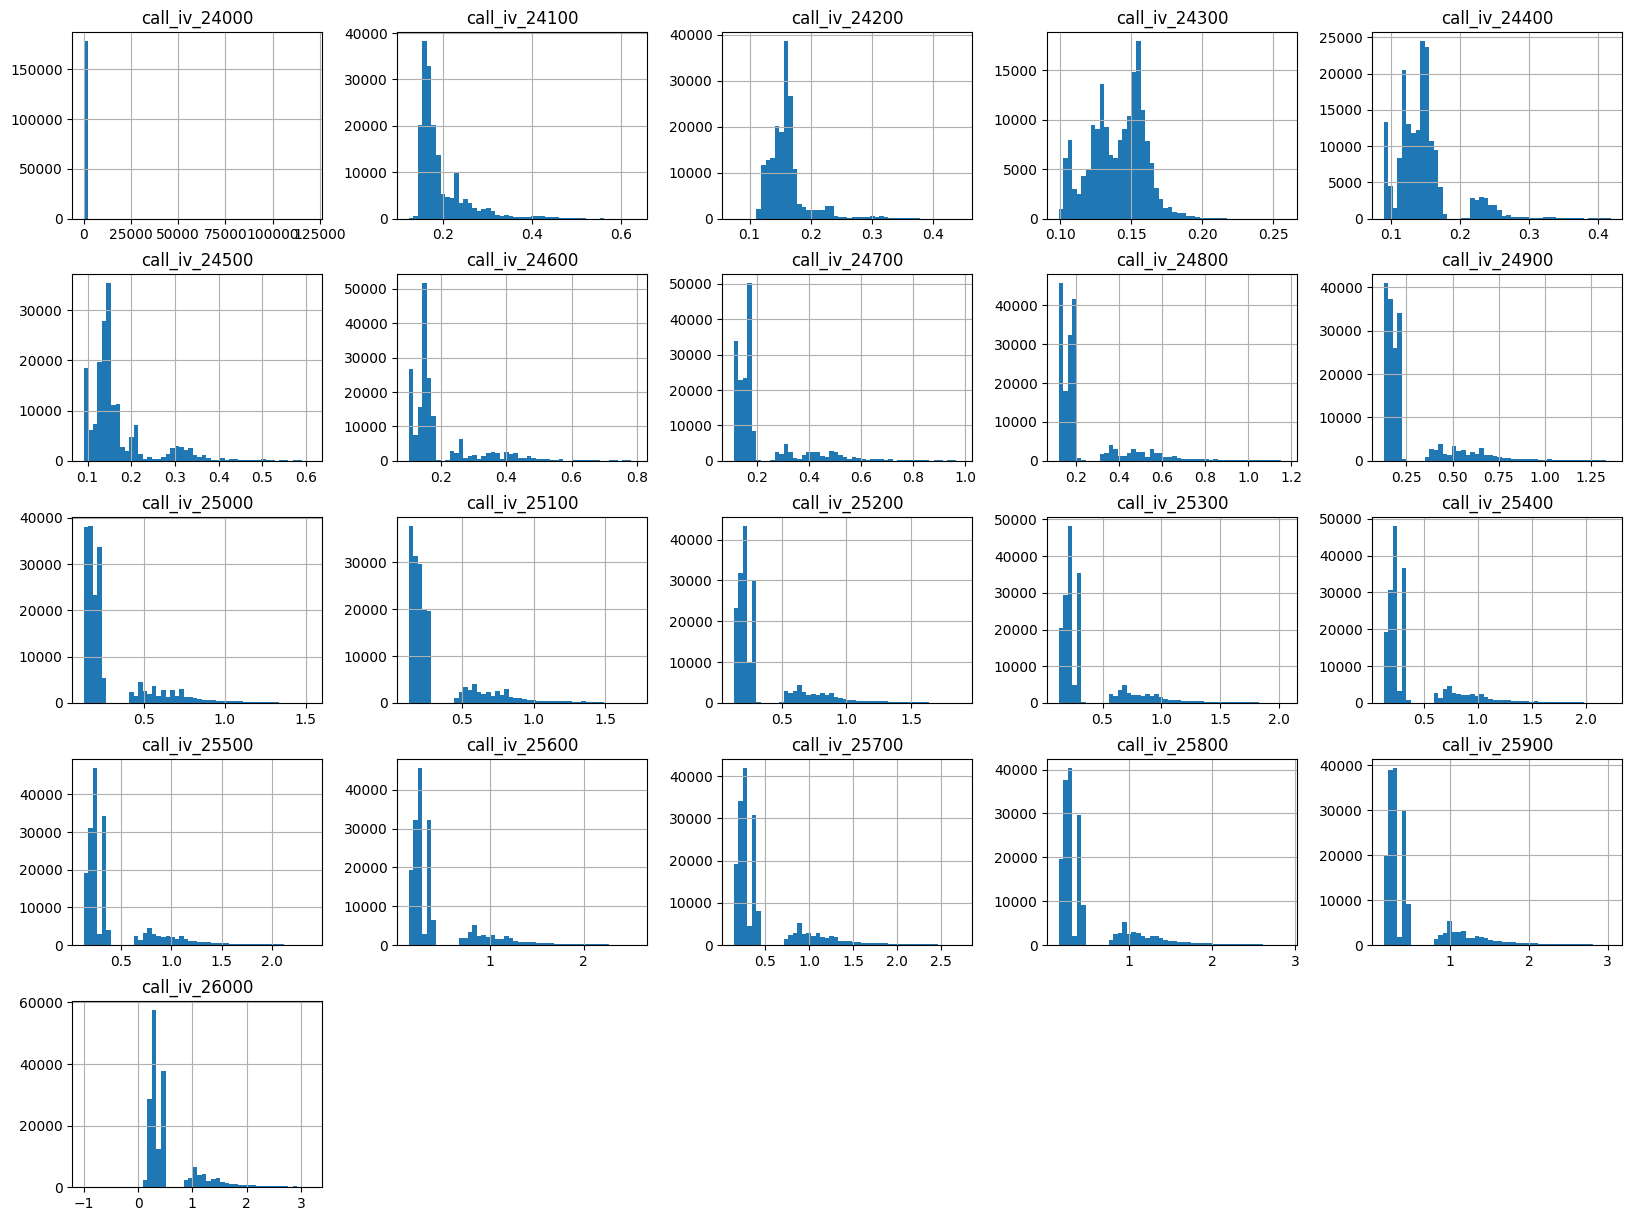

In [20]:
#plot iv_cols from df_1 as histogram

df[call_iv_cols].hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
# prompt: find 0.1 and 0.99 percentile of iv_cols column

# Combine all iv columns for percentile calculation
iv_cols = call_iv_cols + put_iv_cols

# Calculate the 0.1th percentile
percentile_01 = pd.Series(df[iv_cols].values.flatten()).quantile(0.0001)

# Calculate the 99th percentile
percentile_99 = pd.Series(df[iv_cols].values.flatten()).quantile(0.99)

print(f"1th percentile of iv_cols: {percentile_01}")
print(f"99th percentile of iv_cols: {percentile_99}")

1th percentile of iv_cols: 0.0891771
99th percentile of iv_cols: 1.52611


In [22]:
# prompt: cells with _iv_ columns should lie between 0 and 2

# Identify columns that contain '_iv_'
iv_cols = [col for col in df.columns if "_iv_" in col]

df_filtered = df[(df[iv_cols] >= percentile_01).all(axis=1) & (df[iv_cols] <= 1).all(axis=1)]
# Replace values > 1 with np.nan in only those columns


# You can now work with df_filtered which contains the data that satisfies the condition
# print the shape of the filtered dataframe to see how many rows remain
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")
df_filtered.to_csv('filtered_df.csv',index=False)
# Optionally, you can replace the original dataframe with the filtered one
# df = df_filtered

Original shape: (178340, 86)
Filtered shape: (143280, 86)


In [23]:
df_filtered.shape

(143280, 86)

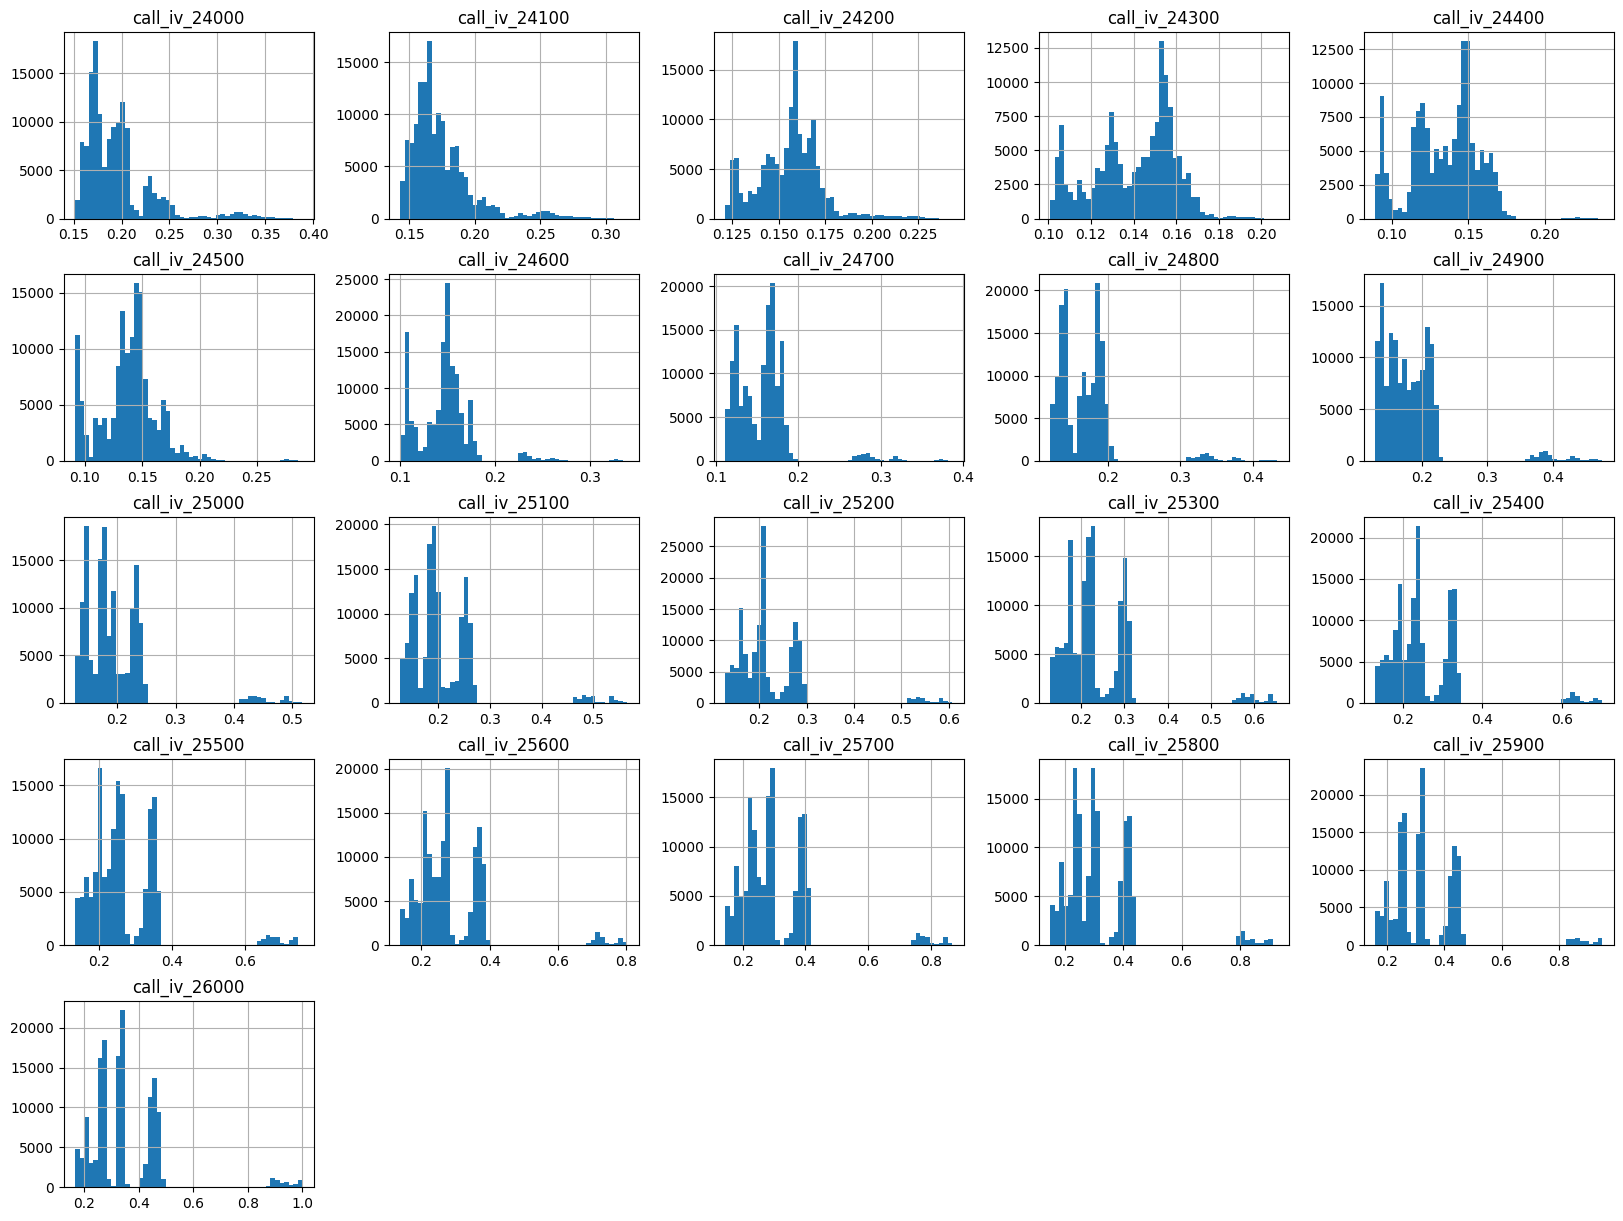

In [24]:
df_filtered[call_iv_cols].hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
scaler=StandardScaler()

In [26]:
def preprocess(ds_frame):
  drop_worthy=['timestamp']
  filtered_df=ds_frame.drop(drop_worthy,axis=1)
  X_cols = [col for col in filtered_df.columns if col.startswith("X")]

# Apply StandardScaler to the identified columns
  filtered_df[X_cols] = scaler.fit_transform(filtered_df[X_cols])
  return filtered_df

In [27]:
df_filtered.shape

(143280, 86)

In [28]:
df_ready=preprocess(df_filtered)
df_ready.head()

,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
415,24311.1,0.342821,0.265599,0.184686,0.149388,0.202117,0.261427,0.314932,0.367981,0.419045,...,-0.834337,-0.918848,0.041308,-1.303903,0.295632,-0.067263,-0.341935,0.259400,-0.228105,-0.064740
419,24311.9,0.341899,0.265785,0.186042,0.151636,0.205472,0.264984,0.317852,0.370817,0.420313,...,-1.502097,0.589446,0.604301,-0.407719,0.219951,0.004865,-0.434836,0.442242,1.840425,0.043649
420,24310.9,0.343579,0.263647,0.184022,0.150565,0.205292,0.265584,0.318755,0.371340,0.420981,...,-0.804555,-2.627212,0.235981,-0.581716,0.341722,0.002424,-0.035778,0.265089,0.077867,0.000190
421,24313.0,0.346416,0.267703,0.187015,0.152750,0.207205,0.266545,0.319475,0.372108,0.421922,...,-1.307318,-0.831548,0.452039,-1.373132,0.178640,-0.081923,0.094838,-0.220619,-0.455362,-0.135998
422,24309.9,0.346155,0.265908,0.185707,0.152864,0.208087,0.267835,0.321144,0.373929,0.424544,...,-0.184064,0.042926,0.432318,0.495231,0.061374,0.002004,-0.457413,-0.015150,-0.214642,0.011428


In [29]:
X_cols = [col for col in df_ready.columns if col.startswith("X")]

In [30]:
df_fire=preprocess(test_df)
df_fire.head()

,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,0.222997,...,0.663962,0.092911,-0.024374,-0.063603,-0.392946,0.046047,0.398702,-0.004258,0.006258,-0.559490
1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,NaN,...,0.580920,0.161123,-0.041717,-0.235256,-0.066972,-0.053319,-0.755161,-0.370345,-0.672751,0.492133
2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.20458,0.194604,NaN,NaN,...,0.073646,-1.369281,0.118565,0.381197,0.849529,1.793902,0.509732,-0.004258,-0.023866,-0.275940
3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.18619,NaN,NaN,NaN,...,-0.967149,-0.905692,-0.565335,0.031009,0.265579,-0.064622,-1.308013,-0.434649,-1.670228,-1.951433
4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,NaN,...,-1.925825,-0.310247,-0.051909,-1.557104,0.109752,-0.534139,0.275949,0.053375,1.608930,0.323592


In [31]:
strike_call_vals = np.array([int(col.split("_")[-1]) for col in call_iv_cols])
strike_call_vals

array([24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 24800,
       24900, 25000, 25100, 25200, 25300, 25400, 25500, 25600, 25700,
       25800, 25900, 26000])

In [32]:
strike_put_vals = np.array([int(col.split("_")[-1]) for col in put_iv_cols])
strike_put_vals

array([23000, 23100, 23200, 23300, 23400, 23500, 23600, 23700, 23800,
       23900, 24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700,
       24800, 24900, 25000])

In [33]:
test_strike_call_iv=[int(col.split("_")[-1]) for col in test_call_iv_cols]
test_strike_put_iv=[int(col.split("_")[-1]) for col in test_put_iv_cols]
display(test_strike_call_iv)
display(test_strike_put_iv)

[24000,
 24100,
 24200,
 24300,
 24400,
 24500,
 24600,
 24700,
 24800,
 24900,
 25000,
 25100,
 25200,
 25300,
 25400,
 25500,
 25600,
 25700,
 25800,
 25900,
 26000,
 26100,
 26200,
 26300,
 26400,
 26500]

[23000,
 23100,
 23200,
 23300,
 23400,
 23500,
 23600,
 23700,
 23800,
 23900,
 24000,
 24100,
 24200,
 24300,
 24400,
 24500,
 24600,
 24700,
 24800,
 24900,
 25000,
 25100,
 25200,
 25300,
 25400,
 25500]

In [34]:
import numpy as np

def fit_smile(strikes, ivs, underlying_price):
    """Fit a quadratic IV smile model in log-moneyness space."""
    log_moneyness = np.log(strikes / underlying_price)
    X = np.column_stack([log_moneyness**2, log_moneyness, np.ones_like(log_moneyness)])

    coefs, _, _, _ = np.linalg.lstsq(X, ivs, rcond=None)
    return coefs  # Returns a, b, c


In [35]:
smile_params = []

for _, row in df_ready.iterrows():
    ivs = row[call_iv_cols].values.astype(np.float64)
    underlying = row['underlying']
    coefs = fit_smile(strike_call_vals, ivs, underlying)
    smile_params.append(coefs)

# Create a DataFrame of smile parameters
smile_df = pd.DataFrame(smile_params, columns=["a", "b", "c"])


In [36]:
smile_df.describe()

,a,b,c
count,143280.000000,143280.000000,143280.000000
mean,50.563849,-0.057211,0.153441
std,21.732645,1.043053,0.021771
min,11.886451,-1.886475,0.120874
25%,30.978207,-0.798112,0.140463
50%,53.027548,-0.249984,0.154636
75%,59.004351,0.302861,0.162147
max,137.231455,5.766048,0.300088


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

X_train = df_ready[X_cols]
y_train = smile_df

regressor = MultiOutputRegressor(xgb_base)
regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [38]:
def predict_smile(strikes, a, b, c, underlying):
    log_moneyness = np.log(strikes / underlying)
    return a * log_moneyness**2 + b * log_moneyness + c


In [39]:
for i, row in df_fire.iterrows():
    x_input = row[X_cols].values.reshape(1, -1)
    a, b, c = regressor.predict(x_input)[0]
    underlying = row['underlying']

    predicted_iv = predict_smile(test_strike_call_iv, a, b, c, underlying)

    for j, col in enumerate(test_call_iv_cols):
        if pd.isna(df_fire.at[i, col]):
            df_fire.at[i, col] = predicted_iv[j]


In [41]:
smile_params_put = []

for _, row in df_ready.iterrows():
    ivs = row[put_iv_cols].values.astype(np.float64)
    underlying = row['underlying']
    coefs = fit_smile(strike_put_vals, ivs, underlying)
    smile_params_put.append(coefs)

# Create a DataFrame of smile parameters
smile_df = pd.DataFrame(smile_params_put, columns=["a", "b", "c"])

In [43]:
X_train = df_ready[X_cols]
y_train = smile_df

regressor = MultiOutputRegressor(xgb_base)
regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [44]:
for i, row in df_fire.iterrows():
    x_input = row[X_cols].values.reshape(1, -1)
    a, b, c = regressor.predict(x_input)[0]
    underlying = row['underlying']

    predicted_iv = predict_smile(test_strike_put_iv, a, b, c, underlying)

    for j, col in enumerate(test_put_iv_cols):
        if pd.isna(df_fire.at[i, col]):
            df_fire.at[i, col] = predicted_iv[j]

TypeError: only integer scalar arrays can be converted to a scalar index

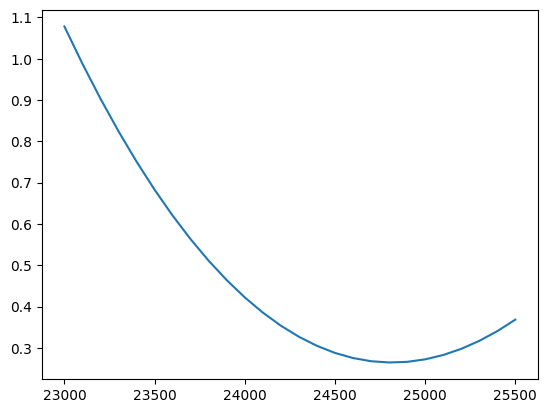

In [45]:
import matplotlib.pyplot as plt

for i in range(5):  # Just show 5 sample rows
    row = df_fire.iloc[i]
    underlying = row['underlying']
    x_input = row[X_cols].values.reshape(1, -1)
    a, b, c = regressor.predict(x_input)[0]

    pred_iv = predict_smile(test_strike_put_iv, a, b, c, underlying)
    true_iv = row[test_put_iv_cols].values.astype(np.float64)

    plt.plot(test_strike_put_iv, pred_iv, label='Predicted Curve')
    plt.scatter(test_strike_put_iv[~np.isnan(true_iv)], true_iv[~np.isnan(true_iv)], c='red', label='Known IVs')
    plt.title(f"IV Smile - Row {i}")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility")
    plt.legend()
    plt.grid(True)
    plt.show()


In [46]:
df_fire.isna().sum().sort_values(ascending=False)

,0
underlying,0
call_iv_24000,0
call_iv_24100,0
call_iv_24200,0
call_iv_24300,0
...,...
X37,0
X38,0
X39,0
X40,0


In [47]:
target = df_fire.drop(columns=[col for col in X_cols if col in df_fire.columns])

target.head()

,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,24735.9,0.280939,0.235179,0.228675,0.224774,0.242149,0.224650,0.232439,0.234557,0.222997,...,0.232334,0.267686,0.264614,0.227301,0.234169,0.282657,0.250422,0.316862,0.340460,0.282229
1,24766.7,0.270276,0.242034,0.258893,0.226750,0.224327,0.225327,0.233548,0.237427,0.248446,...,0.308505,0.228209,0.290275,0.291885,0.300532,0.249402,0.338596,0.367850,0.403810,0.446397
2,24896.9,0.187279,0.251731,0.170444,0.166289,0.214869,0.204580,0.194604,0.177291,0.186779,...,0.194612,0.188052,0.236121,0.228959,0.181346,0.230663,0.190750,0.253316,0.272344,0.296425
3,24898.1,0.241888,0.309227,0.220505,0.277408,0.198602,0.186190,0.252034,0.249394,0.249603,...,0.313343,0.166394,0.161561,0.276470,0.273062,0.172032,0.279256,0.288754,0.302452,0.206107
4,24906.5,0.235328,0.273897,0.222983,0.214126,0.244992,0.242285,0.192603,0.247007,0.254356,...,0.341410,0.316095,0.298426,0.177920,0.285666,0.176000,0.302410,0.321628,0.182314,0.381327


In [48]:
target=target.drop('underlying',axis=1)
target.head()

,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,call_iv_24900,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0.280939,0.235179,0.228675,0.224774,0.242149,0.224650,0.232439,0.234557,0.222997,0.227966,...,0.232334,0.267686,0.264614,0.227301,0.234169,0.282657,0.250422,0.316862,0.340460,0.282229
1,0.270276,0.242034,0.258893,0.226750,0.224327,0.225327,0.233548,0.237427,0.248446,0.229917,...,0.308505,0.228209,0.290275,0.291885,0.300532,0.249402,0.338596,0.367850,0.403810,0.446397
2,0.187279,0.251731,0.170444,0.166289,0.214869,0.204580,0.194604,0.177291,0.186779,0.180668,...,0.194612,0.188052,0.236121,0.228959,0.181346,0.230663,0.190750,0.253316,0.272344,0.296425
3,0.241888,0.309227,0.220505,0.277408,0.198602,0.186190,0.252034,0.249394,0.249603,0.252629,...,0.313343,0.166394,0.161561,0.276470,0.273062,0.172032,0.279256,0.288754,0.302452,0.206107
4,0.235328,0.273897,0.222983,0.214126,0.244992,0.242285,0.192603,0.247007,0.254356,0.264976,...,0.341410,0.316095,0.298426,0.177920,0.285666,0.176000,0.302410,0.321628,0.182314,0.381327


In [49]:
timestamp_series=test_df['timestamp']
df_target=pd.concat([timestamp_series,target],axis=1)
df_target.head()

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.235179,0.228675,0.224774,0.242149,0.224650,0.232439,0.234557,0.222997,...,0.232334,0.267686,0.264614,0.227301,0.234169,0.282657,0.250422,0.316862,0.340460,0.282229
1,1,0.270276,0.242034,0.258893,0.226750,0.224327,0.225327,0.233548,0.237427,0.248446,...,0.308505,0.228209,0.290275,0.291885,0.300532,0.249402,0.338596,0.367850,0.403810,0.446397
2,2,0.187279,0.251731,0.170444,0.166289,0.214869,0.204580,0.194604,0.177291,0.186779,...,0.194612,0.188052,0.236121,0.228959,0.181346,0.230663,0.190750,0.253316,0.272344,0.296425
3,3,0.241888,0.309227,0.220505,0.277408,0.198602,0.186190,0.252034,0.249394,0.249603,...,0.313343,0.166394,0.161561,0.276470,0.273062,0.172032,0.279256,0.288754,0.302452,0.206107
4,4,0.235328,0.273897,0.222983,0.214126,0.244992,0.242285,0.192603,0.247007,0.254356,...,0.341410,0.316095,0.298426,0.177920,0.285666,0.176000,0.302410,0.321628,0.182314,0.381327


In [50]:
df_target.shape



(12065, 53)

In [51]:
df_target.to_csv('submission_5_1.csv',index=False)

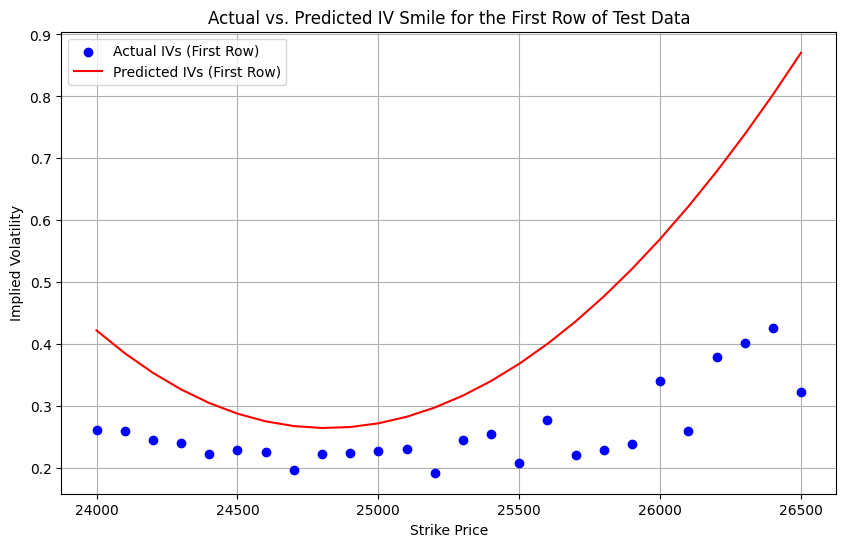

In [59]:
# prompt: plot of first row  test_iv_cols in df fire, colour predicted values in differnt colour

import matplotlib.pyplot as plt
# Extract the first row of test_iv_cols from df_fire
first_row_test = df_fire.iloc[754][test_call_iv_cols]

# Extract the corresponding strike values for the plot
strikes_to_plot = test_strike_call_iv

# Get the predicted values for the first row (assuming they were stored during prediction)
# If not stored, we need to re-run the prediction for the first row
# Let's assume we re-run the prediction for clarity
row_for_prediction = df_fire.iloc[0]
x_input_for_prediction = row_for_prediction[X_cols].values.reshape(1, -1)
a, b, c = regressor.predict(x_input_for_prediction)[0]
underlying_for_prediction = row_for_prediction['underlying']
predicted_iv_first_row = predict_smile(test_strike_call_iv, a, b, c, underlying_for_prediction)


plt.figure(figsize=(10, 6))

# Plot the actual values from the first row
plt.scatter(strikes_to_plot, first_row_test, color='blue', label='Actual IVs (First Row)', zorder=5)

# Plot the predicted values for the first row
plt.plot(strikes_to_plot, predicted_iv_first_row, color='red', label='Predicted IVs (First Row)')

plt.title("Actual vs. Predicted IV Smile for the First Row of Test Data")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
xsa

NameError: name 'xsa' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [ ]:
lr=LinearRegression()

In [ ]:
df_fire[test_spec_cols]

In [ ]:
from sklearn.impute import SimpleImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df_fire_copy=df_fire.copy()
df_fire_imputed_copy=simp_imp.fit_transform(df_fire_copy)
df_fire_imputed_copy=pd.DataFrame(df_fire_imputed_copy,columns=df_fire_copy.columns)
df_fire_imputed_copy.head()

In [ ]:
df_test_spec_imputed_cols=df_fire_imputed_copy[test_spec_cols]
df_test_spec_imputed_cols.head()

In [ ]:
df_attack=df_fire.drop(test_spec_cols,axis=1)
df_attack.head()

In [ ]:
df_fire_imputed_copy_trainer=df_fire_imputed_copy.drop(test_spec_cols,axis=1)
df_fire_imputed_copy_trainer.head()

In [ ]:
df_trial=df_attack.copy()

In [ ]:
for iv in iv_cols:
  X=df_ready.drop(iv, axis=1)
  y=df_ready[iv]
  lr.fit(X, y)
  df_fire_imputed_copy_trainer_predictor=df_fire_imputed_copy_trainer.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_attack.loc[i, iv]):
      df_trial.loc[i, iv] = lr.predict(df_fire_imputed_copy_trainer_predictor.loc[i].values.reshape(1, -1))
df_trial.to_csv('trial.csv',index=False)

In [ ]:
jdf=pd.read_csv('trial.csv')
jdf.head()

In [ ]:
jdf.columns

In [ ]:
test_cols

In [ ]:
jdf_call_iv_cols=[col for col in jdf.columns if "call_iv_" in col]
jdf_call_iv_cols

In [ ]:
jdf_put_iv_cols=[col for col in jdf.columns if "put_iv_" in col]
jdf_put_iv_cols

In [ ]:
test_spec_call_iv_cols=[col for col in test_spec_cols if "call_iv_" in col]
test_spec_call_iv_cols

In [ ]:
test_spec_put_iv_cols=[col for col in test_spec_cols if "put_iv_" in col]
test_spec_put_iv_cols

In [ ]:
submission_2_1=pd.concat([test_df['timestamp'],jdf[jdf_call_iv_cols],df_test_spec_imputed_cols[test_spec_call_iv_cols],jdf[jdf_put_iv_cols],df_test_spec_imputed_cols[test_spec_put_iv_cols]],axis=1)
submission_2_1.head()

In [ ]:
df_fire_2=df_fire.copy()
df_fire_2[df_trial.columns]=df_trial[df_trial.columns]
df_fire_2.head()

In [ ]:
submission_2_1.to_csv('submission_2_2.csv',index=False)

In [ ]:
submission_2_1.describe().loc['max']

In [ ]:
submission_2_1[iv_cols].describe().loc['max'].max()

In [ ]:
test_df[iv_cols].describe().loc['max'].max()

In [ ]:
for iv in test_spec_cols:
  X=df_fire_imputed_copy.drop(iv, axis=1)
  y=df_fire_imputed_copy[iv]
  lr.fit(X, y)
  df_fire_imputed_copy_trainer_predictor_2=df_fire_imputed_copy.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_fire_2.loc[i, iv]):
      df_fire_2.loc[i, iv] = lr.predict(df_fire_imputed_copy_trainer_predictor_2.loc[i].values.reshape(1, -1))
df_fire_2.to_csv('trial_2.csv',index=False)

In [ ]:
df_fire_2.head()

In [ ]:
submission_2_4=pd.concat([test_df['timestamp'],df_fire_2[test_iv_cols]],axis=1)
submission_2_4.head()

In [ ]:
submission_2_4[test_iv_cols].describe().loc['max'].max()

In [ ]:
submission_2_4.shape

In [ ]:
submission_2_4.to_csv('submission_2_3.csv',index=False)

In [ ]:
itftj

In [ ]:
mean_absolute_error_test=[]
mean_absolute_error_train=[]
y_pred_test_list=[]
y_pred_train_list=[]
Y_test_list=[]
Y_train_list=[]

In [ ]:
for iv in iv_cols:
  X=filtered_df.drop(iv, axis=1)
  y=filtered_df[iv]
  X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_train)
  mean_absolute_error_train.append(mean_absolute_error(y_train, y_pred))
  y_pred_test = lr.predict(X_validate)
  mean_absolute_error_test.append(mean_absolute_error(y_validate, y_pred_test))
  y_pred_test_list.append(y_pred_test)
  y_pred_train_list.append(y_pred)
  Y_test_list.append(y_validate)
  Y_train_list.append(y_train)

In [ ]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(iv_cols[6:], mean_absolute_error_train[6:], marker='o', label='Train')
plt.plot(iv_cols[6:], mean_absolute_error_test[6:], marker='o', label='Test')

In [ ]:
y_test_df=pd.DataFrame(Y_test_list)
y_train_df=pd.DataFrame(Y_train_list)
y_pred_test_df=pd.DataFrame(y_pred_test_list)
y_pred_train_df=pd.DataFrame(y_pred_train_list)

In [ ]:
y_test_df.head()

In [ ]:
#plot y_pred_test vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_validate, y_pred_test, label='Test Data')

In [ ]:
y_pred

In [ ]:
df_test_para=pd.read_parquet('test_data.parquet',engine='auto')

In [ ]:
timestamp_series=df_test_para['timestamp']

In [ ]:
df_test_para.drop("timestamp",axis=1,inplace=True)

In [ ]:
iv_cols_test=[col_test for col_test in df_test_para.columns if "_iv_" in col_test]
iv_cols_test

In [ ]:
# prompt: show the column names same in test_para and filtered_df

test_para_set = df_test_para.columns
filtered_df_cols = filtered_df.columns
print("Columns present in both dataframes:")
common_col_list=[]
for common_col in test_para_set.intersection(filtered_df_cols):
  common_col_list.append(common_col)

In [ ]:
df_test_p1=df_test_para[common_col_list]
df_test_p1.shape

In [ ]:
df_test_p1

In [ ]:
df_test_para_copy=df_test_para.copy()

In [ ]:
from sklearn.impute import SimpleImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='median')
#use imputer
imputed_df_test_para_copy=simp_imp.fit_transform(df_test_para_copy)
imputed_df_test_para_copy=pd.DataFrame(imputed_df_test_para_copy,columns=df_test_para_copy.columns)
imputed_df_test_para_copy.head()

In [ ]:
df_target=imputed_df_test_para_copy[iv_cols_test]
df_target.head()

In [ ]:
#concatenate series_timestamp and  df_target
df_target=pd.concat([timestamp_series,df_target],axis=1)
df_target.head()

In [ ]:
df_target.to_csv('submission_1_1.csv',index=False)